CONTOUR: LEFT OUTFLOW IN SIO

BUNIT keyword = K km s-1
Quantity has unit: K km / s
7.589249848322163 K km / s


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
C:\Users\Ayush Shivkumar\AppData\Local\Temp\ipykernel_23064\2140464603.py:78: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for path in contours.collections[2].get_paths():


Number of pixels within the contour: 6535
Sum of pixel values within the contour: 33452174.683493163 K m / s


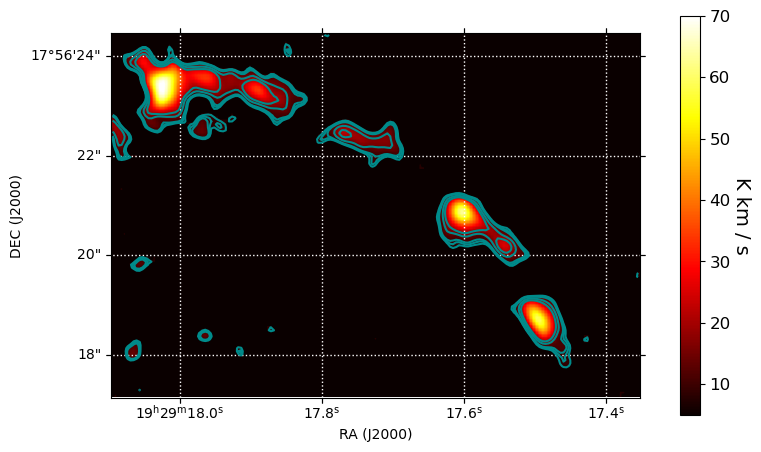

In [14]:
(u.s**(-1)).is_equivalent(u.Hz)   # returns True

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval
from astropy.wcs import WCS
from skimage.draw import polygon
import astropy.units as u
%matplotlib inline
# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data and header
data = hdu.data
header = hdu.header

# read the unit string from the header
bunit = hdu.header.get('BUNIT', None)
print("BUNIT keyword =", bunit)
# e.g. prints "K.km/s" or similar

# turn your array into a Quantity
if bunit is not None:
    data_q = data * u.Unit(bunit)
    print("Quantity has unit:", data_q.unit)
else:
    print("No BUNIT found in header!")

# Define the pixel boundaries of the rectangular region
# Example: xmin, xmax, ymin, ymax
xmin, xmax = 23, 200   # Adjust these values as needed
ymin, ymax = 56, 178  # Adjust these values as needed

# Slice the data to extract the region of interest
data_region = data_q[ymin:ymax, xmin:xmax]
# Create a WCS object for the region of interest
wcs = WCS(header)
wcs_slice = wcs[ymin:ymax, xmin:xmax]

# Display the image with WCS projection for the region of interest
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs_slice)


sigma = np.std(data_region)
print(sigma)

# Numeric boolean mask
mask = data_region.value > sigma.value

# Numeric where
smoothed_vals = np.where(mask,
                         data_region.value,
                         0.0)

# Turn it back into a Quantity
smoothed_data = smoothed_vals * data_region.unit


im = ax.imshow(smoothed_data.value, cmap='hot', origin='lower', vmin=5, vmax=70)

# Show contours on the smoothed image
contour_levels = [8, 9, 10, 15, 20]  # Adjust as needed
contours = ax.contour(data_region.value, levels=contour_levels, colors='darkcyan')
# Optionally, add more customizations
ax.grid(color='white', ls='dotted', lw = 1)

cbar = plt.colorbar(im, pad=.06, shrink=0.55)
cbar.set_label(f"{smoothed_data.unit}", rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_CONTOUR_wing2.png")
mask = np.zeros(smoothed_data.shape, dtype=bool)
for path in contours.collections[2].get_paths():
    vertices = path.vertices
    x = vertices[:, 0]
    y = vertices[:, 1]
    rr, cc = polygon(y, x, shape=smoothed_data.shape)
    mask[rr, cc] = True

# Calculate the number of pixels and sum of pixel values within the contour
num_pixels_within_leftcontour = np.sum(mask)
sum_pixel_values_within_leftcontour = np.sum(smoothed_data[mask])
sum_pixel_values_within_leftcontour = sum_pixel_values_within_leftcontour.to(u.K * u.m/u.s)
print(f"Number of pixels within the contour: {num_pixels_within_leftcontour}")
print(f"Sum of pixel values within the contour: {sum_pixel_values_within_leftcontour}")

BUNIT keyword = K km s-1
Quantity has unit: K km / s
7.589249848322163 K km / s


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
C:\Users\Ayush Shivkumar\AppData\Local\Temp\ipykernel_10204\3577118024.py:76: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for path in contours.collections[2].get_paths():


Number of pixels within the contour: 6535
Sum of pixel values within the contour: 33452174.683493163 K m / s


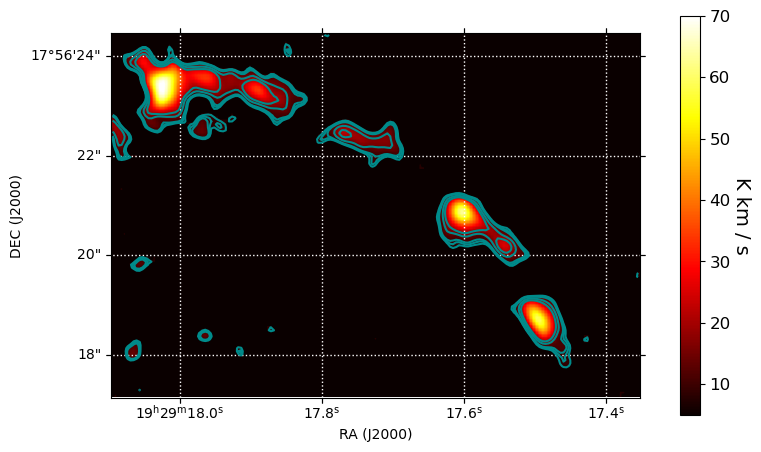

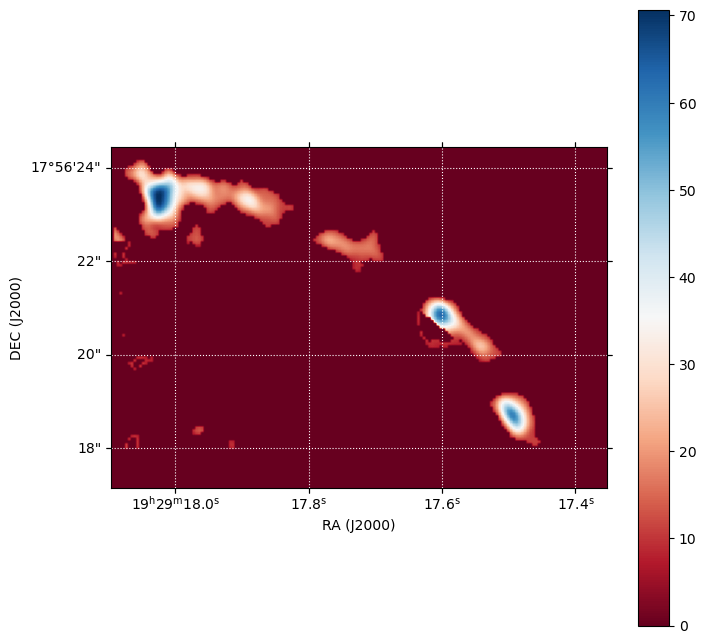

The SiO (8-7) column density of Left Outflow is: 2.0977277129170454e+17 1 / cm2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval
from astropy.wcs import WCS
from skimage.draw import polygon
import astropy.units as u
%matplotlib inline
# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data and header
data = hdu.data
header = hdu.header

# read the unit string from the header
bunit = hdu.header.get('BUNIT', None)
print("BUNIT keyword =", bunit)
# e.g. prints "K.km/s" or similar

# turn your array into a Quantity
if bunit is not None:
    data_q = data * u.Unit(bunit)
    print("Quantity has unit:", data_q.unit)
else:
    print("No BUNIT found in header!")

# Define the pixel boundaries of the rectangular region
# Example: xmin, xmax, ymin, ymax
xmin, xmax = 23, 200   # Adjust these values as needed
ymin, ymax = 56, 178  # Adjust these values as needed

# Slice the data to extract the region of interest
data_region = data_q[ymin:ymax, xmin:xmax]
# Create a WCS object for the region of interest
wcs = WCS(header)
wcs_slice = wcs[ymin:ymax, xmin:xmax]

# Display the image with WCS projection for the region of interest
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs_slice)


sigma = np.std(data_region)
print(sigma)

# Numeric boolean mask
mask = data_region.value > sigma.value

# Numeric where
smoothed_vals = np.where(mask,
                         data_region.value,
                         0.0)

# Turn it back into a Quantity
smoothed_data = smoothed_vals * data_region.unit


im = ax.imshow(smoothed_data.value, cmap='hot', origin='lower', vmin=5, vmax=70)

# Show contours on the smoothed image
contour_levels = [8, 9, 10, 15, 20]  # Adjust as needed
contours = ax.contour(data_region.value, levels=contour_levels, colors='darkcyan')
# Optionally, add more customizations
ax.grid(color='white', ls='dotted', lw = 1)

cbar = plt.colorbar(im, pad=.06, shrink=0.55)
cbar.set_label(f"{smoothed_data.unit}", rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_CONTOUR_wing2.png")
mask = np.zeros(smoothed_data.shape, dtype=bool)
for path in contours.collections[2].get_paths():
    vertices = path.vertices
    x = vertices[:, 0]
    y = vertices[:, 1]
    rr, cc = polygon(y, x, shape=smoothed_data.shape)
    mask[rr, cc] = True

# Calculate the number of pixels and sum of pixel values within the contour
num_pixels_within_leftcontour = np.sum(mask)
sum_pixel_values_within_leftcontour = np.sum(smoothed_data[mask])
sum_pixel_values_within_leftcontour = sum_pixel_values_within_leftcontour.to(u.K * u.m/u.s)

print(f"Number of pixels within the contour: {num_pixels_within_leftcontour}")
print(f"Sum of pixel values within the contour: {sum_pixel_values_within_leftcontour}")

# Create a masked version of the smoothed data
masked_vals = np.where(mask, smoothed_data.value, 0)

masked_data = masked_vals * data_region.unit

# Display the masked data
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(1, 1, 1, projection=wcs_slice)
im2 = ax2.imshow(masked_data.value, cmap='RdBu', origin='lower')
plt.colorbar(im2, ax=ax2, orientation='vertical')

ax2.grid(color='white', ls='dotted')

# Set plot labels

ax2.set_xlabel("RA (J2000)")
ax2.set_ylabel("DEC (J2000)")
plt.show()

############################################################### CONTOUR PARAMETERS ########################################################################################
from astropy import constants as const
def N_sio_left():
    term1 = ((8 * np.pi * k_b * (nu**2))/(h * (c**3) * A))
    term2 = (Qrot / (gj*gk*gi))
    term3 = np.exp(Eu / T_ex)
    return term1 * term2 * term3 * Tdv
    
Tdv = sum_pixel_values_within_leftcontour
k_b = const.k_B                                # Boltzmann constant
nu = 347.331 * 1e9 * 1/u.s                     # Rest Frequency of SiO v=0 (J=8-7) line transiton
h   = const.h                                  # Planck's constant
c   = const.c                                  # speed of light
A = 0.00220343 * 1/u.s                         # From CDMS
Qrot = 18.332                                  # for T_ex = 18.75 K from CDMS/JPL Splatalogue
gj = 17                                        #2J_u + 1 = 2*8 + 1 = 16+1 = 17
gk = 1                                         # Heteronuclear Rigid Rotor
gi = 1
Eu = 75.01697 * u.K                            # from JPL Splatalogue
T_ex = 18.75 * u.K                             # Excitation Temperature

LeftOutflowColDens = N_sio_left()
LeftOutflowColDens = LeftOutflowColDens.to(1/u.cm**2)
print(f"The SiO (8-7) column density of Left Outflow is: {LeftOutflowColDens}")

# # print(abs(ra_min1 - ra_max1))
# # print(abs(dec_min1 - dec_max1))

# solidangle_subtended_1pixel = 8.4615945e-14 # 0.06 arcsec to steradian (refer to https://hea-www.harvard.edu/~pgreen/figs/Constants.pdf)

# solid_angle =  (num_pixels_within_leftcontour) * solidangle_subtended_1pixel 

# print("The solid angle subtended by Left outflow: %e steradian" %(solid_angle))

# def M_sio_left():
#     return ((d**2/(SiO_H2_ratio)) * m_avg_h2 * (N_sio_left() * solid_angle))
# Msol =  1.9884 * 10**30 # in kg
# d = 1.7 * 10**3 * 3.086e+18 # parsec In cm
# SiO_H2_ratio = 10**-9 # (Liu et al. 2021a; Sanhueza et al. 2012) #1.8 * 10**-10
# m_avg_h2 = 3.34711509e-27 # avg atomic weight of hydrogen in kg

# LeftOutflowMass = M_sio_left()/Msol
# print("The SiO(8-7) Left Outflow Mass is: %f solar masses" %LeftOutflowMass)


CONTOUR: RIGHT OUTFLOW IN SIO

BUNIT keyword = K km s-1
Quantity has unit: K km / s
8.145299112651118 K km / s


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
C:\Users\Ayush Shivkumar\AppData\Local\Temp\ipykernel_10204\459181566.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for path in contours.collections[2].get_paths():


Number of pixels within the contour: 1840
Sum of pixel values within the contour: 21646337.629808586 K m / s


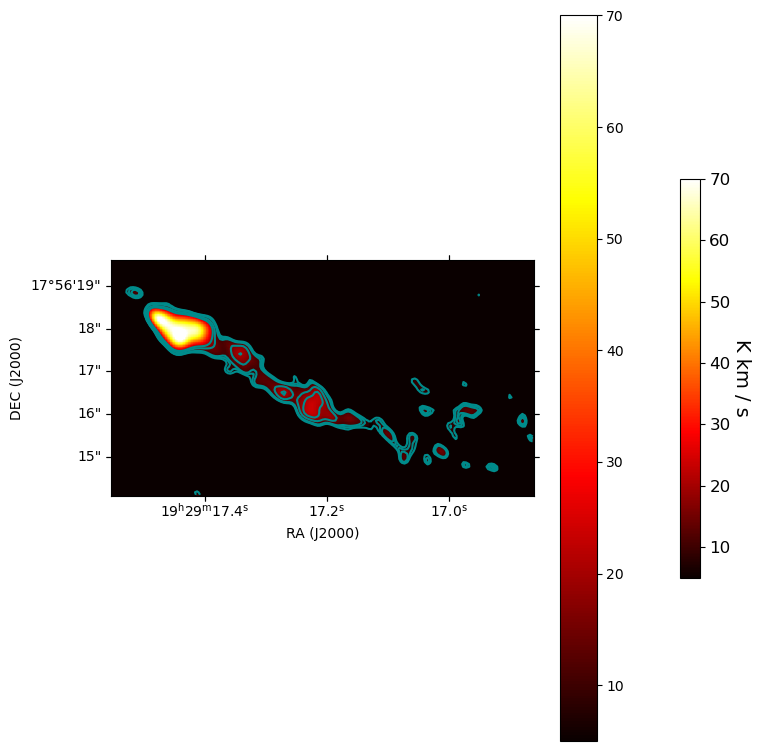

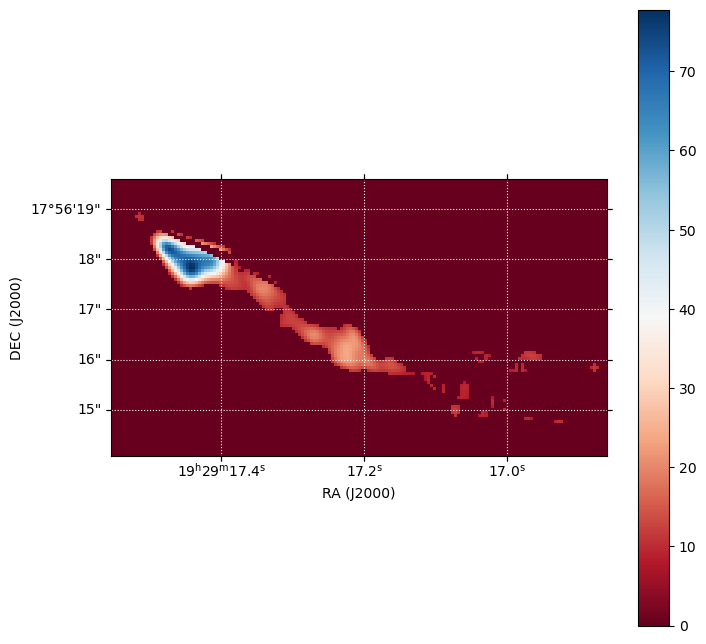

The SiO (8-7) column density of Right Outflow is: 1.3574041974501286e+17 1 / cm2


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval
from astropy.wcs import WCS
from skimage.draw import polygon
# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing1.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data and header
data = hdu.data
header = hdu.header

# read the unit string from the header
bunit = hdu.header.get('BUNIT', None)
print("BUNIT keyword =", bunit)
# e.g. prints "K.km/s" or similar

# turn your array into a Quantity
if bunit is not None:
    data_q = data * u.Unit(bunit)
    print("Quantity has unit:", data_q.unit)
else:
    print("No BUNIT found in header!")

# Define the pixel boundaries of the rectangular region
# Example: xmin, xmax, ymin, ymax
xmin, xmax = 152, 317  # Adjust these values as needed
ymin, ymax = 5, 97  # Adjust these values as needed

# Slice the data to extract the region of interest
data_region = data_q[ymin:ymax, xmin:xmax]
# Create a WCS object for the region of interest
wcs = WCS(header)
wcs_slice = wcs[ymin:ymax, xmin:xmax]

# Display the image with WCS projection for the region of interest
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs_slice)


sigma = np.std(data_region)
print(sigma)

# Numeric boolean mask
mask = data_region.value > sigma.value

# Numeric where
smoothed_vals = np.where(mask,
                         data_region.value,
                         0.0)

# Turn it back into a Quantity
smoothed_data = smoothed_vals * data_region.unit


im = ax.imshow(smoothed_data.value, cmap='hot', origin='lower', vmin=5, vmax=70)

# Show contours on the smoothed image
contour_levels = [8, 9, 10, 15, 20]  # Adjust as needed
contours = ax.contour(data_region.value, levels=contour_levels, colors='darkcyan')
# Optionally, add more customizations
ax.grid(color='white', ls='dotted', lw = 1)

cbar = plt.colorbar(im, pad=.06, shrink=0.55)
cbar.set_label(f"{smoothed_data.unit}", rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_CONTOUR_wing1.png")
mask = np.zeros(smoothed_data.shape, dtype=bool)
for path in contours.collections[2].get_paths():
    vertices = path.vertices
    x = vertices[:, 0]
    y = vertices[:, 1]
    rr, cc = polygon(y, x, shape=smoothed_data.shape)
    mask[rr, cc] = True

# Calculate the number of pixels and sum of pixel values within the contour
num_pixels_within_rightcontour = np.sum(mask)
sum_pixel_values_within_rightcontour = np.sum(smoothed_data[mask])
sum_pixel_values_within_rightcontour = sum_pixel_values_within_rightcontour.to(u.K * u.m/u.s)

print(f"Number of pixels within the contour: {num_pixels_within_rightcontour}")
print(f"Sum of pixel values within the contour: {sum_pixel_values_within_rightcontour}")
# Create a masked version of the smoothed data
masked_data = np.where(mask, smoothed_data, 0)

# Display the masked data
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(1, 1, 1, projection=wcs_slice)
im2 = ax2.imshow(masked_data.value, cmap='RdBu', origin='lower')
plt.colorbar(im2, ax=ax2, orientation='vertical')

# Optionally, add more customizations
ax.grid(color='white', ls='dotted')
plt.colorbar(im, ax=ax, orientation='vertical')

ax2.grid(color='white', ls='dotted')


# Set plot labels
ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")
ax2.set_xlabel("RA (J2000)")
ax2.set_ylabel("DEC (J2000)")
plt.show()

############################################################# CONTOUR PARAMETERS ########################################################################################
from astropy import constants as const
def N_sio_right():
    term1 = ((8 * np.pi * k_b * (nu**2))/(h * (c**3) * A))
    term2 = (Qrot / (gj*gk*gi))
    term3 = np.exp(Eu / T_ex)
    return term1 * term2 * term3 * Tdv
    
Tdv = sum_pixel_values_within_rightcontour
k_b = const.k_B                                # Boltzmann constant
nu = 347.331 * 1e9 * 1/u.s                     # Rest Frequency of SiO v=0 (J=8-7) line transiton
h   = const.h                                  # Planck's constant
c   = const.c                                  # speed of light
A = 0.00220343 * 1/u.s                         # From CDMS
Qrot = 18.332                                  # for T_ex = 18.75 K from CDMS/JPL Splatalogue
gj = 17                                        #2J_u + 1 = 2*8 + 1 = 16+1 = 17
gk = 1                                         # Heteronuclear Rigid Rotor
gi = 1
Eu = 75.01697 * u.K                            # from JPL Splatalogue
T_ex = 18.75 * u.K                             # Excitation Temperature

RightOutflowColDens = N_sio_right()
RightOutflowColDens = RightOutflowColDens.to(1/u.cm**2)
print(f"The SiO (8-7) column density of Right Outflow is: {RightOutflowColDens}")

# print(abs(ra_min1 - ra_max1))
# print(abs(dec_min1 - dec_max1))

# solidangle_subtended_1pixel = 8.4615945e-14 # 0.06 arcsec to steradian (refer to https://hea-www.harvard.edu/~pgreen/figs/Constants.pdf)

# solid_angle =  (num_pixels_within_rightcontour) * solidangle_subtended_1pixel 

# print("The solid angle subtended by right outflow: %e steradian" %(solid_angle))

# def M_sio_right():
#     return ((d**2/(SiO_H2_ratio)) * m_avg_h2 * (N_sio_right() * solid_angle))
# Msol =  1.9884 * 10**30 # in kg
# d = 1.7 * 10**3 * 3.086e+18 # parsec In cm
# SiO_H2_ratio = 10**-9 # (Liu et al. 2021a; Sanhueza et al. 2012) #1.8 * 10**-10
# m_avg_h2 = 3.34711509e-27 # avg atomic weight of hydrogen in kg

# RightOutflowMass = M_sio_right()/Msol
# print("The SiO(8-7) right Outflow Mass is: %f solar masses" %RightOutflowMass)


VELOCITY OF SIO LOBES - FIRST PART: LEFT OUTFLOW (WING 2) - RED LOBE

In [7]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - WING 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2_CUBE.fits"
cube = SpectralCube.read(filename)
print(cube)

lon_range = [292.3253525, 292.322747] * u.deg 
lat_range = [17.93830844, 17.94012173] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
print(sub_cube)

spec_axis = cube.spectral_axis
print(spec_axis.unit)
average_spectrum = cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (WING 2)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SiO WING 2')
plt.legend()
plt.show()


# Calculate the cumulative flux
cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
median_velocity_leftlobe = spec_axis[median_index]

print(f"The median velocity is {median_velocity_leftlobe:.2f}")
max_redlobe = spec_axis[0]
print(f"The max velocity of red lobe is {max_redlobe:.3f}")

SpectralCube with shape=(13, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     13  type_s: VRAD      unit_s: km / s  range:       27.993 km / s:      38.107 km / s
SpectralCube with shape=(13, 110, 150) and unit=K:
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.325358 deg
 n_y:    110  type_y: DEC--SIN  unit_y: deg    range:    17.938303 deg:   17.940119 deg
 n_s:     13  type_s: VRAD      unit_s: km / s  range:       27.993 km / s:      38.107 km / s
km / s


The median velocity is 30.52 km / s
The max velocity of red lobe is 38.107 km / s


VELOCITY OF SIO LOBES - SECOND PART: RIGHT OUTFLOW (WING 1) - BLUE LOBE

In [8]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - WING 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing1_CUBE.fits"
cube = SpectralCube.read(filename)
print(cube)

# lon_range = [292.3230297, 292.3202851] * u.deg 
# lat_range = [17.93728685, 17.93877295] * u.deg

# sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
# print(sub_cube)

spec_axis = cube.spectral_axis
print(spec_axis.unit)
average_spectrum = cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (WING 1)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SiO WING 1')
plt.legend()
plt.show()


# Calculate the cumulative flux
cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
median_velocity_rightlobe = spec_axis[median_index]
max_bluelobe = spec_axis[-1]
print(f"The median velocity is {median_velocity_rightlobe:.2f}")
print(f"The max velocity of blue lobe is {max_bluelobe:.3f}")

SpectralCube with shape=(10, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     10  type_s: VRAD      unit_s: km / s  range:       10.294 km / s:      17.879 km / s
km / s
The median velocity is 14.51 km / s
The max velocity of blue lobe is 10.294 km / s


VELOCITY OF SIO LOBES - THIRD PART: CORE SPECTRUM

In [9]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - CORE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCH.fits"
cube = SpectralCube.read(filename)
print(cube)

spec_axis = cube.spectral_axis
print(spec_axis.unit)
average_spectrum = cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (CORE)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of CORE')
plt.legend()
plt.show()

peak_index = np.argmax(average_spectrum)
peak_velocity_core = spec_axis[peak_index]

# Calculate the cumulative flux
# cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
# cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
# median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
# median_velocity_core = spec_axis[median_index]

# print(f"The median velocity is {median_velocity_core:.2f}")

print(f"The peak velocity of core is {peak_velocity_core:.4f}")


SpectralCube with shape=(31, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     31  type_s: VRAD      unit_s: km / s  range:        5.340 km / s:      30.537 km / s
km / s


The peak velocity of core is 17.0986 km / s


VELOCITIES OF LOBES!!

In [12]:
vel_leftoutflow = abs(median_velocity_leftlobe - peak_velocity_core) 
vel_rightoutflow = abs(median_velocity_rightlobe - peak_velocity_core)

print("The velocity of the outflow (v) is %.3f km/s for red lobe and %.3f km/s for blue lobe" %(vel_leftoutflow.value, vel_rightoutflow.value))

v_lobe_red = abs(max_redlobe - peak_velocity_core)
v_lobe_blue = abs(max_bluelobe - peak_velocity_core)

print("The velocity of the lobe (vlobe) is %.3f km/s for red lobe and %.3f km/s for blue lobe" %(v_lobe_red.value, v_lobe_blue.value))

The velocity of the outflow (v) is 13.423 km/s for red lobe and 2.591 km/s for blue lobe
The velocity of the lobe (vlobe) is 21.008 km/s for red lobe and 6.805 km/s for blue lobe


OUTFLOW MOMENTA, ENERGY, DYNAMICAL TIMESCALE

In [13]:
p_leftoutflow =  abs(((M_sio_left()/Msol) * vel_leftoutflow.value) / np.cos(0.67))
p_rightoutflow = abs(((M_sio_right()/Msol) * vel_rightoutflow.value) / np.cos(0.67))

print("The momenta are %.2f and %.2f Mo.Km/s" %(p_leftoutflow, p_rightoutflow))

####

E_leftoutflow = 0.5 * (M_sio_left()/Msol) * (vel_leftoutflow.value/np.cos(0.67))**2 
E_rightoutflow = 0.5 * (M_sio_right()/Msol) * (vel_rightoutflow.value/np.cos(0.67))**2 

print("The Energies are %.2f and %.2f Mo.Km^2/s^2" %(E_leftoutflow, E_rightoutflow))

####

l_flow_redlobe = 10 * 0.0106 * 3.086e+13 # arcsec Conversion to parsec to km
l_flow_bluelobe = 8.642 * 0.0106 * 3.086e+13 # arcsec Conversion to parsec to km

t_dyn_redlobe = ((l_flow_redlobe/v_lobe_red.value) * (np.cos(0.67)/np.sin(0.67))) * 3.17098e-8 # Conversion of second to years
t_dyn_bluelobe = ((l_flow_bluelobe/v_lobe_blue.value) * (np.cos(0.67)/np.sin(0.67))) * 3.17098e-8 # Conversion of second to years

print("The dynamical timescales for SiO outflow are %f years for red lobe and %f years blue lobe " %(t_dyn_redlobe, t_dyn_bluelobe))

####

Mdot_rate_redlobe = ((LeftOutflowMass / t_dyn_redlobe) * (np.sin(0.67)/np.cos(0.67)))
Mdot_rate_bluelobe = ((RightOutflowMass / t_dyn_bluelobe) * (np.sin(0.67)/np.cos(0.67)))

print("The mass rate of outflow for SiO are %f 10^-4 Mo / year for red lobe and %f 10^-4 Mo / year for blue lobe "
      %(Mdot_rate_redlobe * 10**4, Mdot_rate_bluelobe* 10**4))

The momenta are 1.22 and 0.24 Mo.Km/s
The Energies are 10.48 and 0.39 Mo.Km^2/s^2
The dynamical timescales for SiO outflow are 6232.207174 years for red lobe and 16627.899262 years blue lobe 
The mass rate of outflow for SiO are 0.498583 10^-4 Mo / year for red lobe and 0.034047 10^-4 Mo / year for blue lobe 


V lobe

In [39]:
from astropy.table import Table
ColDens = ["%.2e"%float(LeftOutflowColDens), "%.2e"%float(RightOutflowColDens)]
Mass = ["%.3f"%LeftOutflowMass, "%.3f"%RightOutflowMass]
Velo = ["%.3f"%vel_leftoutflow.value, "%.3f"%vel_rightoutflow.value]
Momentum = ["%.3f"%p_leftoutflow, "%.3f"%p_rightoutflow]
Energy = ["%.2f" %E_leftoutflow, "%.2f" %E_rightoutflow]
Tdynamical = ["%.2f" %t_dyn_redlobe, "%.2f" %t_dyn_bluelobe]
MassRate = ["%.2e" %Mdot_rate_redlobe, "%.2e" %Mdot_rate_bluelobe]
table = Table([ColDens, Mass, Velo, Momentum, Energy, Tdynamical, MassRate], names=('N_sio', 'Mass', 'v', 'p', 'E', 'tdyn', 'M*'))

table.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SioOutflowParameters.csv", format='csv', overwrite=True)
print(table)

 N_sio    Mass   v      p     E     tdyn     M*   
-------- ----- ------ ----- ----- ------- --------
2.38e+12 0.657 13.423 2.949 36.34 3206.44 3.15e-04
1.54e+12 0.120  2.591 0.569  1.35 8554.98 2.15e-05


CO OUTFLOW PARAMETERS (nilesh code)
